<a href="https://colab.research.google.com/github/herreraskarina/Exercises/blob/main/GitHub_Semana4_Exerc%C3%ADcio_Karina_Herrera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical Clustering


The objective is to identify different `client profiles` of a supermarkt. Identify similar clusters to create sales and marketing strategies more adequate to each group, in order to encourage customer loyalty and boost sales.

# Clustering

### Activity 1: Create a dataframe from the database `customer_supermarket`.

The dataset is available at [.csv](https://drive.google.com/file/d/1L3ohl-YgU5SPcUS2LihG29Kj9XPE6er9/view?usp=share_link) or at [.xlsx](https://docs.google.com/spreadsheets/d/18Cl-4fdjVAV-mKD74zRFpQ9esz_nU7fP/edit?usp=share_link&ouid=111649208388214484177&rtpof=true&sd=true)


Data dictionary:


**Personal information**

`ID`: client ID

`Year_Birth`: client's date of birth

`Education`: client's education level

`Marital_Status`: client's martial status

`Income`: client's family income

`Kidhome`: number of kids

`Teenhome`: number of teens

`Dt_Customer`: client's registration date

`Days_Registered`: number of days since the registration

`Recency`: number of days since the last purchase

`Complain`: 1 if the client filed a complaint in the last 2 years, 0 if not



**Products**

`MntWines`: Amount spent in wines in the last 2 years

`MntFruits`: Amount spent in fruits in the last 2 years

`MntMeatProducts`: Amount spent in meat products in the last 2 years

`MntFishProducts`: Amount spent in fish products in the last 2 years

`MntSweetProducts`: Amount spent in sweet products in the last 2 years

`MntGoldProds`: Amount spent in gold products in the last 2 years



**Deals**

`NumDealsPurchases`: Number of purchases with discount

`AcceptedCmp1`: 1 if the client engaged in the first campaign, 0 if not

`AcceptedCmp2`: 1 if the client engaged in the second campaign, 0 if not

`AcceptedCmp3`: 1 if the client engaged in the third campaign, 0 if not

`AcceptedCmp4`: 1 if the client engaged in the fourth campaign, 0 if not

`AcceptedCmp5`: 1 if the client engaged in the fifth campaign, 0 if not

`Response`: 1 if the client engaged in the last campaign, 0 if not



**Environments**

`NumWebPurchases`: Number of purchases made on the company's website

`NumCatalogPurchases`: Number of purchases made using a catalog

`NumStorePurchases`: Number of purchases made directly in the store

`NumWebVisitsMonth`: Number of visits to the website in the last month


Obs: this dataset has been `adapted` from the original one available at [kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis).

In [1]:
# importing data
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# creating dataset
df = pd.read_csv('/content/drive/MyDrive/customer_supermarket.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Days_Registered,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1965,Graduation,Single,58138.0,0,0,04-09-2020,849,58,...,7,0,0,0,0,0,0,3,11,1
1,2174,1962,Graduation,Single,46344.0,1,1,08-03-2022,299,38,...,5,0,0,0,0,0,0,3,11,0
2,4141,1973,Graduation,Together,71613.0,0,0,21-08-2021,498,26,...,4,0,0,0,0,0,0,3,11,0
3,6182,1992,Graduation,Together,26646.0,1,0,10-02-2022,325,26,...,6,0,0,0,0,0,0,3,11,0
4,5324,1989,PhD,Married,58293.0,1,0,19-01-2022,347,94,...,5,0,0,0,0,0,0,3,11,0


In [3]:
# checking basic information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Days_Registered      2240 non-null   int64  
 9   Recency              2240 non-null   int64  
 10  MntWines             2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

### Activity 2: Treat the data.

In [4]:
# checking how many null data there is in the dataset
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Days_Registered         0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
# there is only few, so I will drop them
df = df.dropna()

In [6]:
# checking if the values have really been droped
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Days_Registered        0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [7]:
# looking for outliers through the function describe
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Days_Registered,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1976.820397,52247.251354,0.441787,0.505415,539.521209,49.012635,305.091606,26.356047,166.995939,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,202.434667,28.948352,337.327920,39.793917,224.283273,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1901.000000,1730.000000,0.000000,0.000000,186.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1967.000000,35303.000000,0.000000,0.000000,366.000000,24.000000,24.000000,2.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1978.000000,51381.500000,0.000000,0.000000,541.500000,49.000000,174.500000,8.000000,68.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1985.000000,68522.000000,1.000000,1.000000,715.000000,74.000000,505.000000,33.000000,232.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,2004.000000,666666.000000,2.000000,2.000000,885.000000,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
# a max value (666666.000000), which is very different from the mean value in one of the variables (Income), has been identified
# droping the identified outlier
df = df.drop(df[df['Income'] == 666666.000000].index)

In [9]:
# checking if the outlier has been really removed
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Days_Registered,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,...,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.0,2215.0,2215.000000
mean,5586.618059,1976.816704,51969.861400,0.441535,0.505643,539.503837,49.024379,305.225282,26.361625,167.063205,...,5.318736,0.073589,0.074041,0.073138,0.064108,0.013544,0.009481,3.0,11.0,0.150339
std,3249.082838,11.987000,21526.320095,0.536886,0.544198,202.478727,28.949608,337.345380,39.802036,224.311559,...,2.425863,0.261160,0.261896,0.260421,0.245001,0.115614,0.096929,0.0,0.0,0.357484
min,0.000000,1901.000000,1730.000000,0.000000,0.000000,186.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.500000,1967.000000,35284.000000,0.000000,0.000000,366.000000,24.000000,24.000000,2.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5455.000000,1978.000000,51373.000000,0.000000,0.000000,541.000000,49.000000,175.000000,8.000000,68.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8419.000000,1985.000000,68487.000000,1.000000,1.000000,715.000000,74.000000,505.000000,33.000000,232.500000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,2004.000000,162397.000000,2.000000,2.000000,885.000000,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


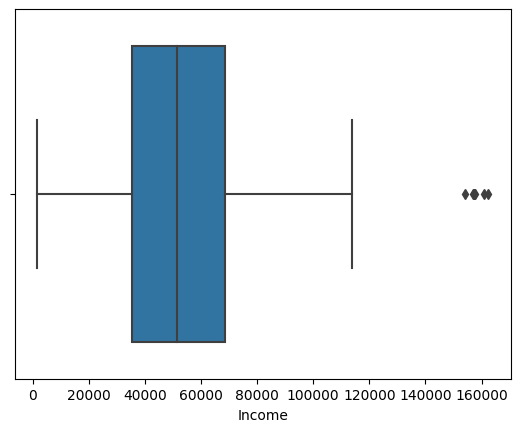

In [11]:
# using boxplot to identify other outliers
import seaborn as sns
sns.boxplot(x=df['Income']);

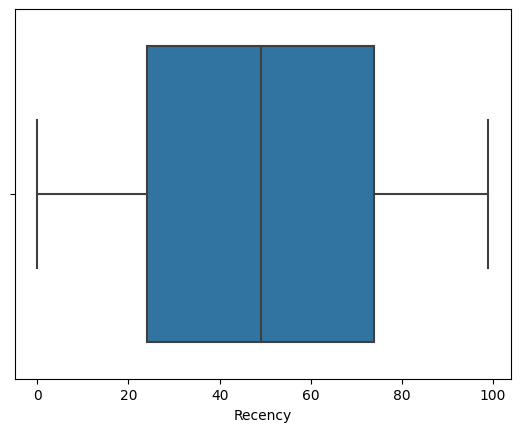

In [12]:
sns.boxplot(x=df['Recency']);

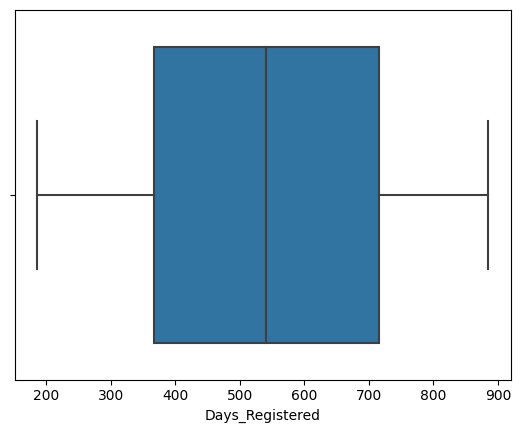

In [13]:
sns.boxplot(x=df['Days_Registered']);

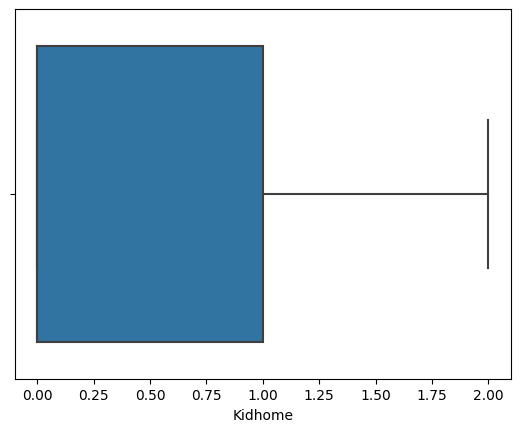

In [14]:
sns.boxplot(x=df['Kidhome']);

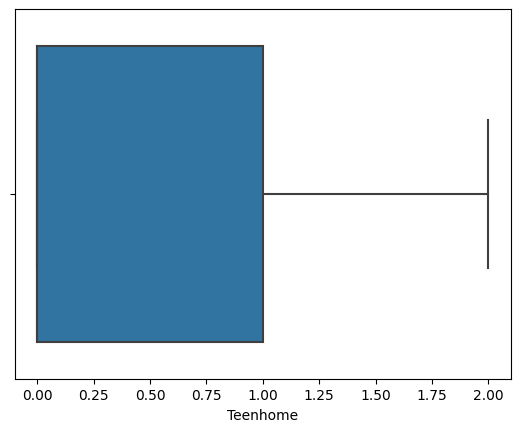

In [15]:
sns.boxplot(x=df['Teenhome']);

In [16]:
# merging the information about children in one variable and creating a column to store the information
df['Children'] = df['Kidhome'] + df['Teenhome']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Days_Registered,Recency,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children
0,5524,1965,Graduation,Single,58138.0,0,0,04-09-2020,849,58,...,0,0,0,0,0,0,3,11,1,0
1,2174,1962,Graduation,Single,46344.0,1,1,08-03-2022,299,38,...,0,0,0,0,0,0,3,11,0,2
2,4141,1973,Graduation,Together,71613.0,0,0,21-08-2021,498,26,...,0,0,0,0,0,0,3,11,0,0
3,6182,1992,Graduation,Together,26646.0,1,0,10-02-2022,325,26,...,0,0,0,0,0,0,3,11,0,1
4,5324,1989,PhD,Married,58293.0,1,0,19-01-2022,347,94,...,0,0,0,0,0,0,3,11,0,1


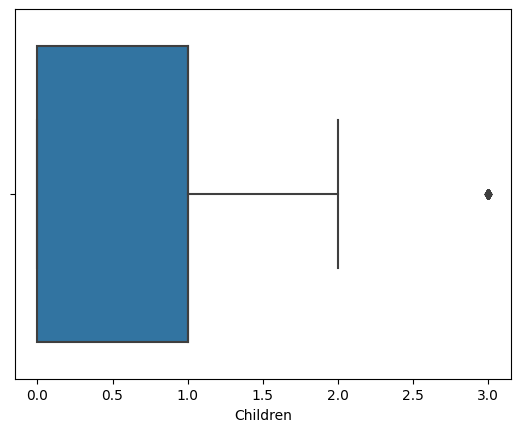

In [17]:
sns.boxplot(x=df['Children']);

In [18]:
# removing outlier, because what is important for this variable is the information if the client has or does not have children
df = df.drop(df[df['Children'] == 3].index)

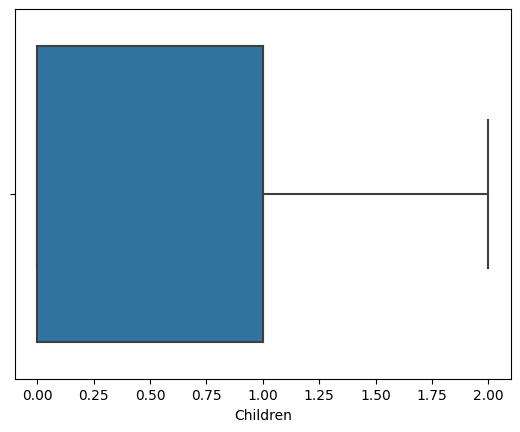

In [19]:
sns.boxplot(x=df['Children']);

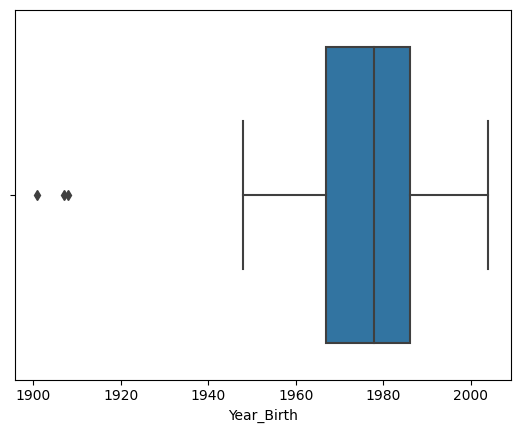

In [20]:
sns.boxplot(x=df['Year_Birth']);

In [21]:
# removing outliers (e.g., people older than 100)
df.Year_Birth.min()

1901

In [22]:
df = df.drop(df[df['Year_Birth'] == 1901].index)

In [23]:
df.Year_Birth.min()

1907

In [24]:
df = df.drop(df[df['Year_Birth'] == 1907].index)

In [25]:
df.Year_Birth.min()

1908

In [26]:
df = df.drop(df[df['Year_Birth'] == 1908].index)

In [27]:
df.Year_Birth.min()

1948

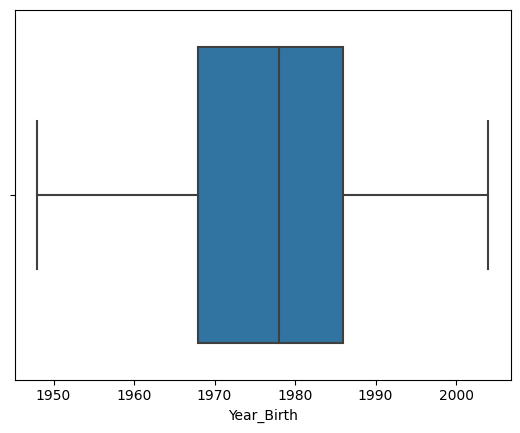

In [28]:
sns.boxplot(x=df['Year_Birth']);

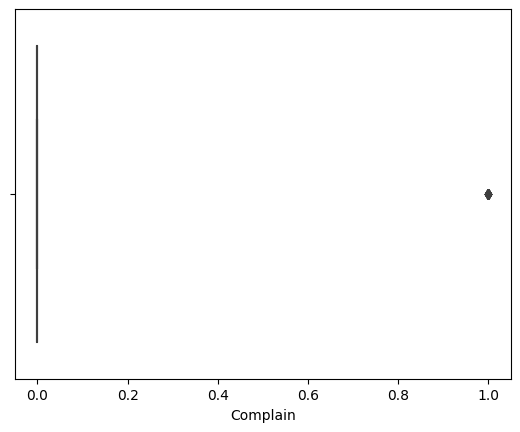

In [30]:
sns.boxplot(x=df['Complain']);

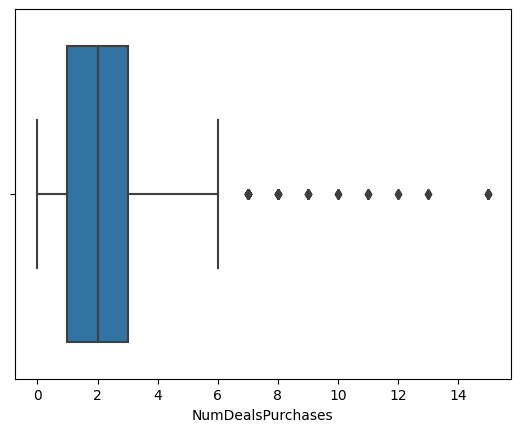

In [31]:
sns.boxplot(x=df['NumDealsPurchases']);

## Conclusion about the variables, after treating the data:


**Less important information**: 

`ID` will not be used

`Dt_Customer`: there is already a variable with this information in the form of number of days; this one is harder to use, because it's a date and pandas reads it as an object

`Complain`: only a single customer made a complaint, and since the goal is to identify customer profiles from the data to make marketing campaigns to large, concise groups of customers, it might not be interesting to include

`Response`

**Relevant information, but difficult to use**:

`Education` and `Marital_Status` need to be further treated and changed to be used as numbers

**Profile information**:

`Year_Birth`, `Income` and `Children` (kid `Kidhome` or teen `Teenhome`)

**How long has been a client**: 

`Days_Registered`: Number of days since registration

**When was the last purchase?** 

`Recency`

**What types of products has purchased in the last 2 years?**

`MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts` and `MntGoldProds`

**Sensitive to deals?**

`NumDealsPurchases`: Number of purchases made with a discount

**How many attempts does it take to react to campaigns?**
*answers 0-1*

`AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`

**Where purchases?**

`NumWebPurchases`: company's website, `NumCatalogPurchases`: catalog or `NumStorePurchases`: store

**How many times visited the website in the last month?**

`NumWebVisitsMonth`

### Activity 3: Create a new column called "MntTotal" with the sum of columns "MntFruits", "MntMeatProducts", "MntSweetProducts", "MntWines" e "MntGoldProds"

In [32]:
# creating a new column with the sum
df['MntTotal'] = df['MntFruits'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntWines'] + df['MntGoldProds']

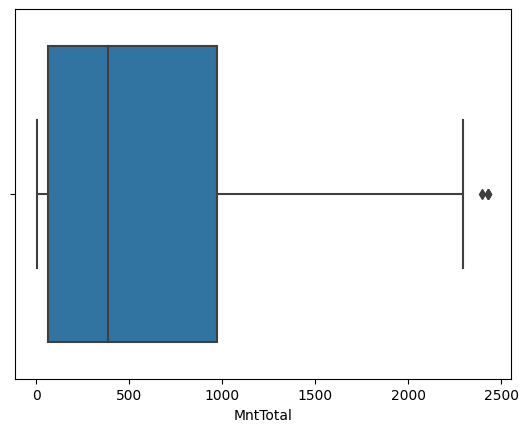

In [33]:
# checking how the variable is distributed
sns.boxplot(x=df['MntTotal']);

### Activity 4: Create a DataFrame containing only the columns `Recency`, `Days_Registered`, `MntTotal` and `Income` and use it to perform the clustering.

In [34]:
# selecting the indicated columns
df_select = df[['Recency', 'Days_Registered', 'MntTotal', 'Income']]
df_select.head()

,Recency,Days_Registered,MntTotal,Income
0,58,849,1445,58138.0
1,38,299,25,46344.0
2,26,498,665,71613.0
3,26,325,43,26646.0
4,94,347,376,58293.0


### Activity 5: Standardize the data.

In [35]:
# standardizing the data in the selected columns with StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = df_select.copy()
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled)
df_scaled.head()

,Recency,Days_Registered,MntTotal,Income
0,0.317040,1.525507,1.522738,0.280009
1,-0.375815,-1.191399,-0.968400,-0.265212
2,-0.791528,-0.208373,0.154367,0.902940
3,-0.791528,-1.062963,-0.936822,-1.175824
4,1.564179,-0.954287,-0.352633,0.287174


### Activty 6: Perform the hierarchical clustering and plot the dendogram.

In [36]:
# importing functions to plot the dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram

# generating the distance matrix with the function linkage
distancias = linkage(df_scaled[['MntTotal','Income']],method='ward',metric='euclidean')

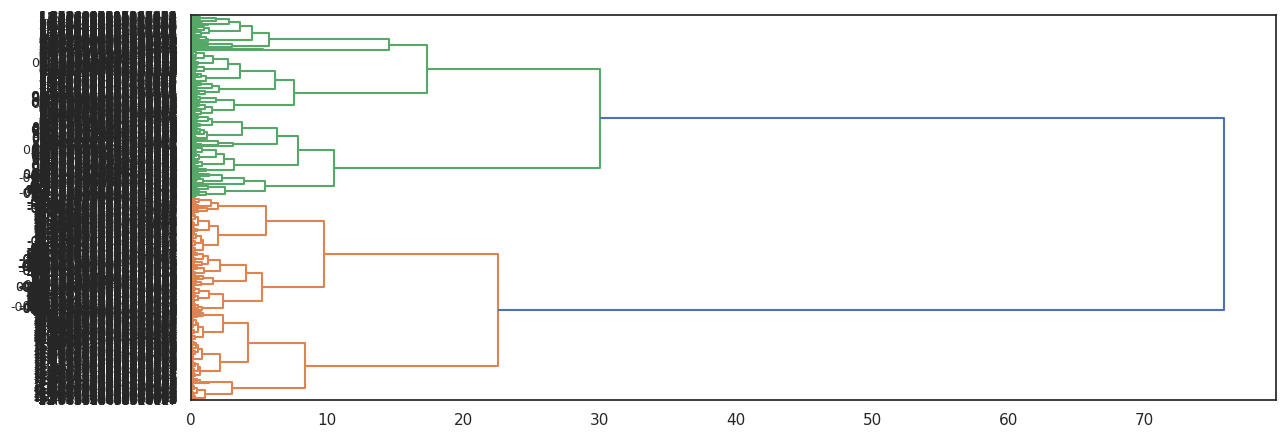

In [37]:
# ploting the dendrogram
sns.set(style='white', rc={'figure.figsize':(14,5)})

dn = dendrogram(distancias,
                leaf_font_size=9,
                orientation='right',
                labels=df_scaled['Income'].values)

### Activity 7: find the quantity that appears to be the more adequate number of clusters.

**Answer**: The x-axis is the distance between elements and the y-axis is each row in the dataset. Observing the x-axis, it is noted that, between 40 and 70, the number of groups is always 2, e.g., it does not vary much, while, from 0 to 20, there are several groups that are close (e.g., similar) to each other. It would be interesting to compare 2 groups, because there are 2 groups that are very different from each other, while a larger number of clusters would probably not bring many differences or more information, since the groups are relatively close/similar to each other. It would also be interesting to see what happens between 30 and 40, i.e. comparing 3 clusters, as the difference/distance between them is significant, although not as big as using 2 clusters.

In [38]:
# importing the function fcluster
from scipy.cluster.hierarchy import fcluster

# obtaining groups taking the distance 2 into account
grupos = fcluster(distancias, t=2, criterion='maxclust')
grupos

array([2, 1, 2, ..., 2, 2, 1], dtype=int32)

In [39]:
# including a column with the groups in the dataset with all the original columns
df['grupo'] = grupos
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Days_Registered,Recency,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,MntTotal,grupo
0,5524,1965,Graduation,Single,58138.0,0,0,04-09-2020,849,58,...,0,0,0,0,3,11,1,0,1445,2
1,2174,1962,Graduation,Single,46344.0,1,1,08-03-2022,299,38,...,0,0,0,0,3,11,0,2,25,1
2,4141,1973,Graduation,Together,71613.0,0,0,21-08-2021,498,26,...,0,0,0,0,3,11,0,0,665,2
3,6182,1992,Graduation,Together,26646.0,1,0,10-02-2022,325,26,...,0,0,0,0,3,11,0,1,43,1
4,5324,1989,PhD,Married,58293.0,1,0,19-01-2022,347,94,...,0,0,0,0,3,11,0,1,376,2


### Activity 8: Create graphs to visualize the groups.

#### Activity 8.1: Create visualizations in Boxplot

In [40]:
# creating the groups

grupo1 = df[df['grupo'] == 1]
grupo2 = df[df['grupo'] == 2]

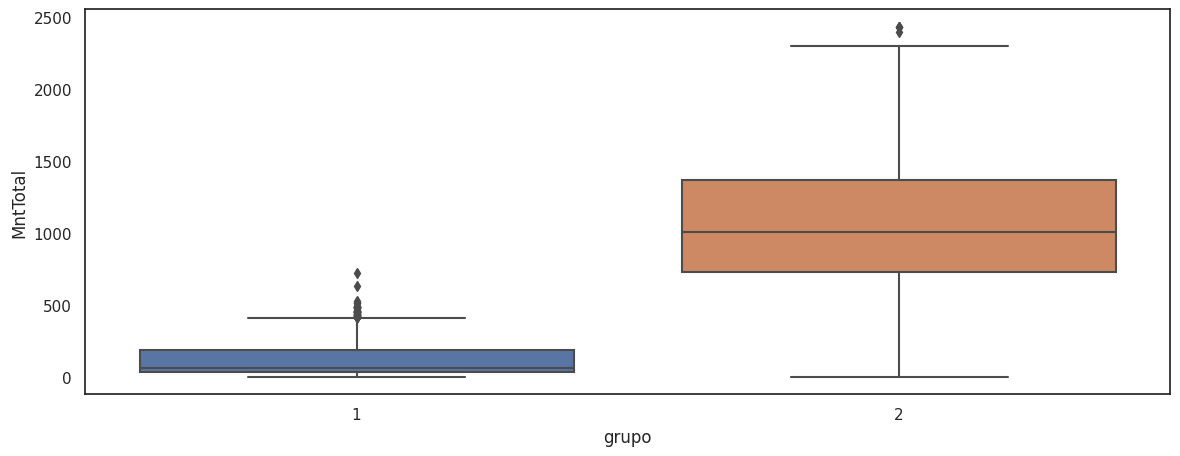

In [41]:
# MntTotal (purchase total)
sns.boxplot(data=df, x='grupo', y='MntTotal');

**Comment**: Group 2 has customers who spend considerably more.

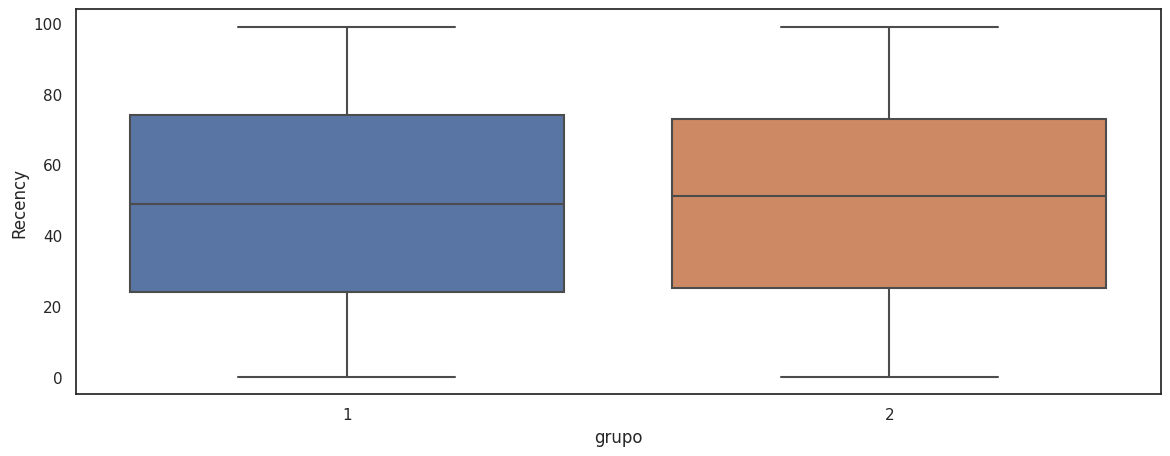

In [42]:
# Recency (days since the last purchase)
sns.boxplot(data=df, x='grupo', y='Recency');

**Comment**: It is not possible to see a big difference between the groups, that is, in both groups, it has been 20 to 80 days since most customers in each group have not purchased.

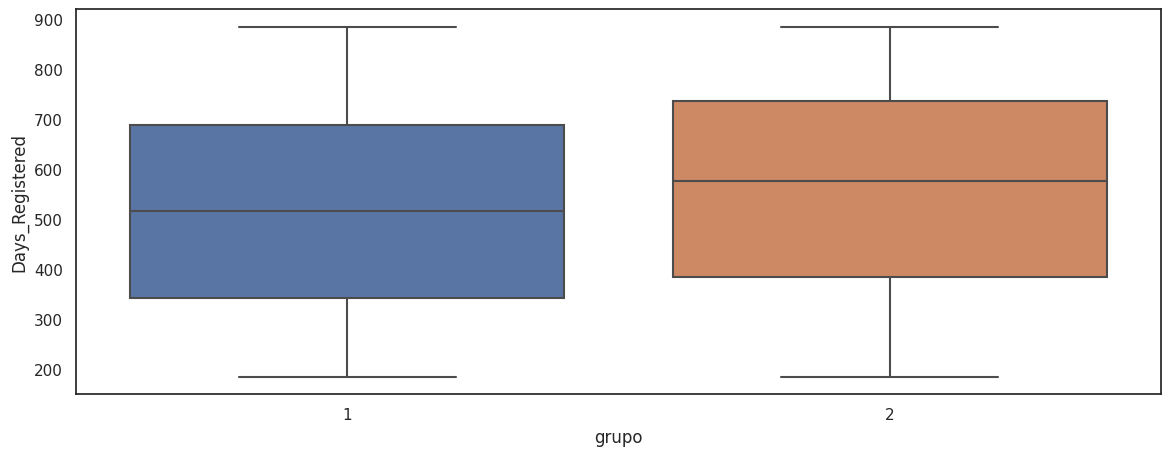

In [43]:
# Days_Registered (when the client registered)
sns.boxplot(data=df, x='grupo', y='Days_Registered');

**Comment**: Group 2 clients have a little more time at home. Group 1 has more new customers.

In [44]:
# analysing the variable Year_Birth
df.Year_Birth.describe()

count    2162.000000
mean     1977.055042
std        11.724558
min      1948.000000
25%      1968.000000
50%      1978.000000
75%      1986.000000
max      2004.000000
Name: Year_Birth, dtype: float64

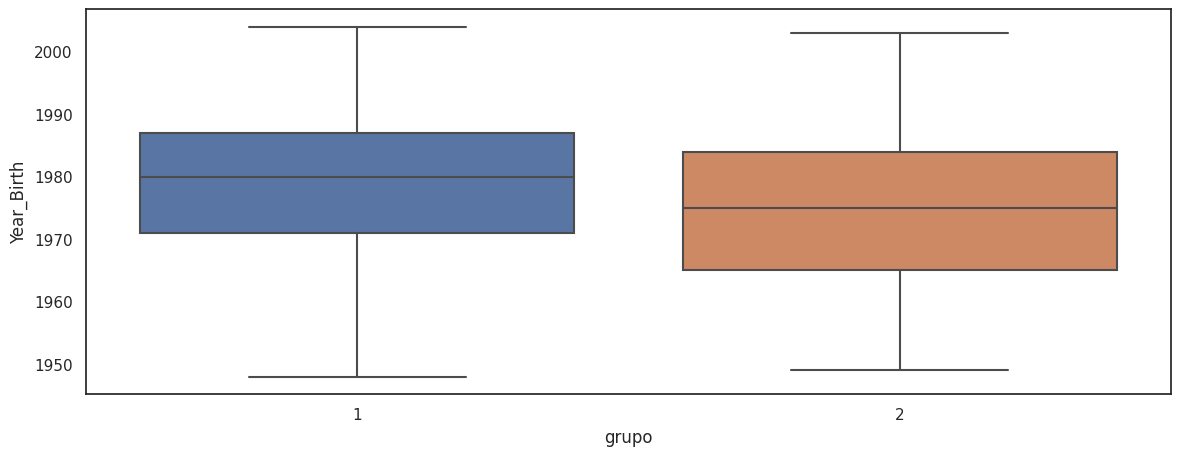

In [45]:
# Year_Birth
sns.boxplot(data=df, x='grupo', y='Year_Birth');

**Comment**: Group 1 has older customers and Group 2 has younger customers.

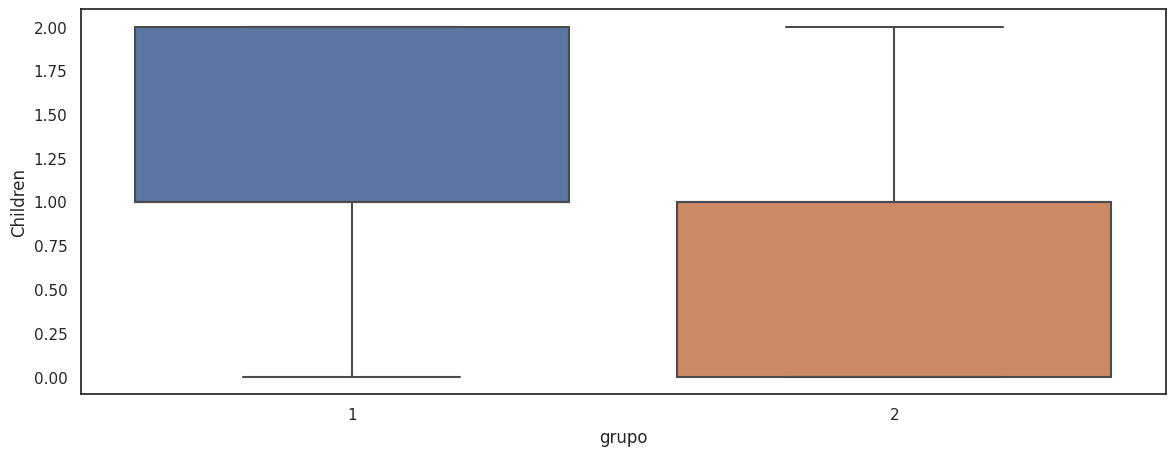

In [ ]:
# Children
sns.boxplot(data=df, x='grupo', y='Children');

**Comment**: Group 2 has more customers without children.

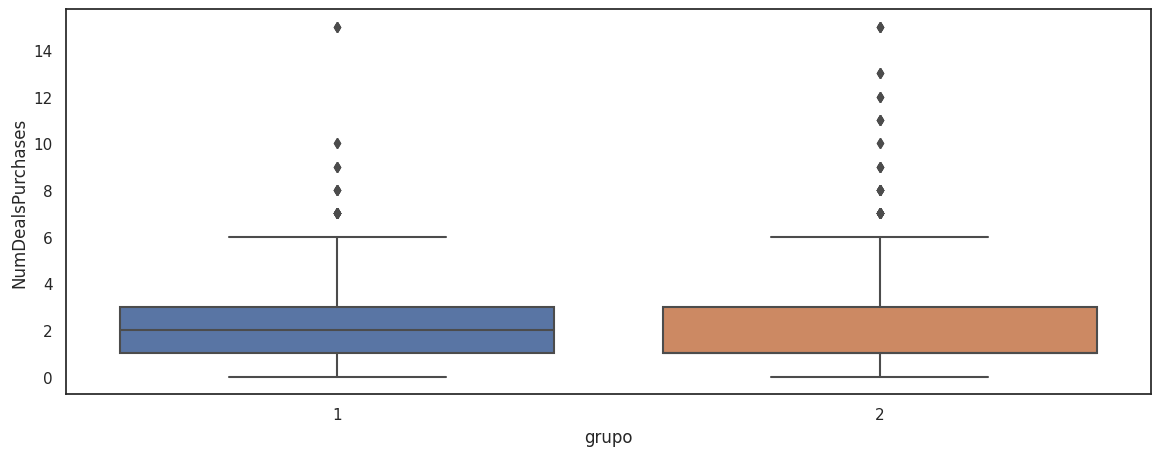

In [46]:
# NumDealsPurchases
sns.boxplot(data=df, x='grupo', y='NumDealsPurchases');

**Comment**: It is not possible to observe a significant difference between the groups in terms of sensitivity to promotions.

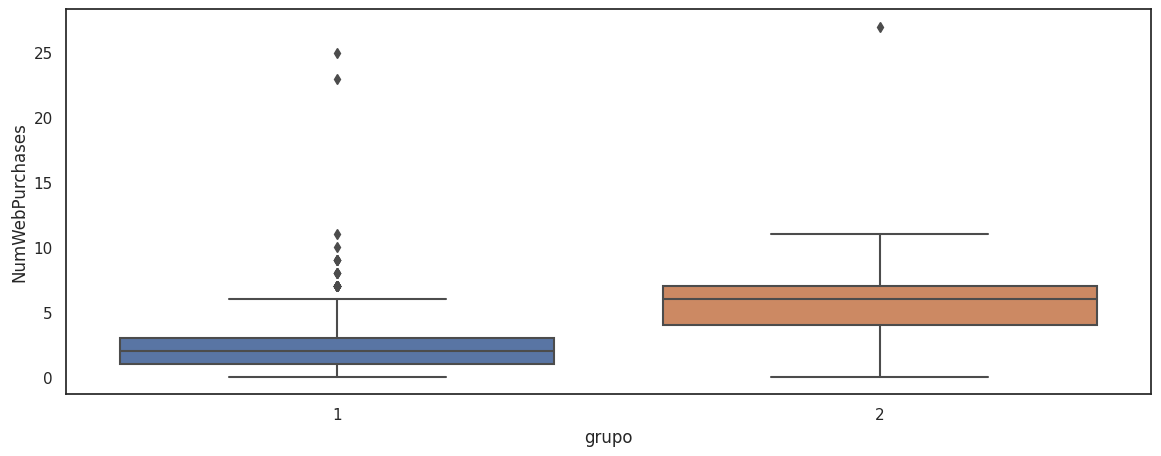

In [47]:
# NumWebPurchases
sns.boxplot(data=df, x='grupo', y='NumWebPurchases');

**Comment**: Customers in group 2 have purchased more through the website in the last 2 years than those in group 1.

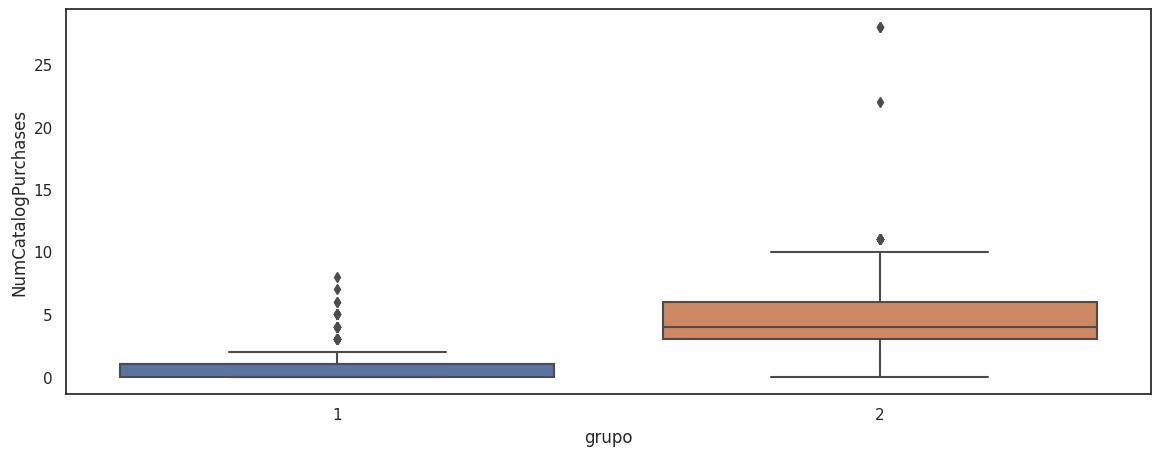

In [48]:
# NumCatalogPurchases
sns.boxplot(data=df, x='grupo', y='NumCatalogPurchases');

**Comment**: Group 1 customers bought very little from the catalog in the last 2 years.

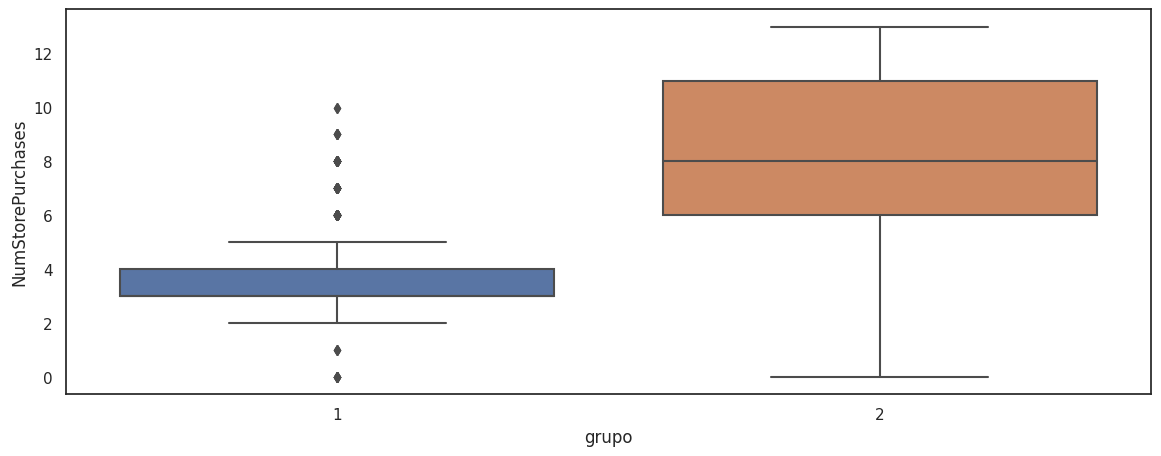

In [49]:
# NumStorePurchases
sns.boxplot(data=df, x='grupo', y='NumStorePurchases');

**Comment**: Customers in group 2 bought more at the physical store in the last 2 years than those in group 1.

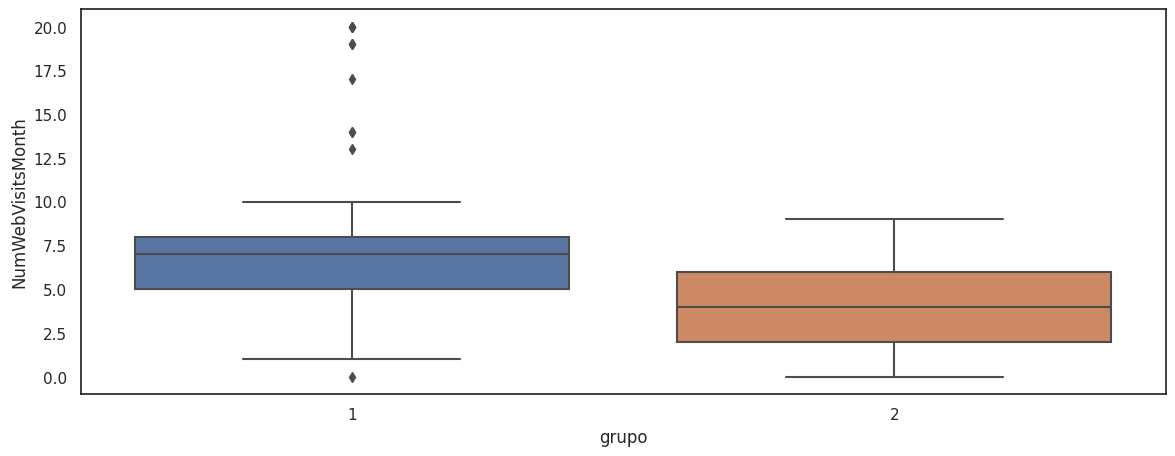

In [50]:
# NumWebVisitsMonth
sns.boxplot(data=df, x='grupo', y='NumWebVisitsMonth');

**Comment**: Customers in group 1 visited the store's website more in the last month than those in group 2.

In [ ]:
# what kinds of products do the two groups buy?

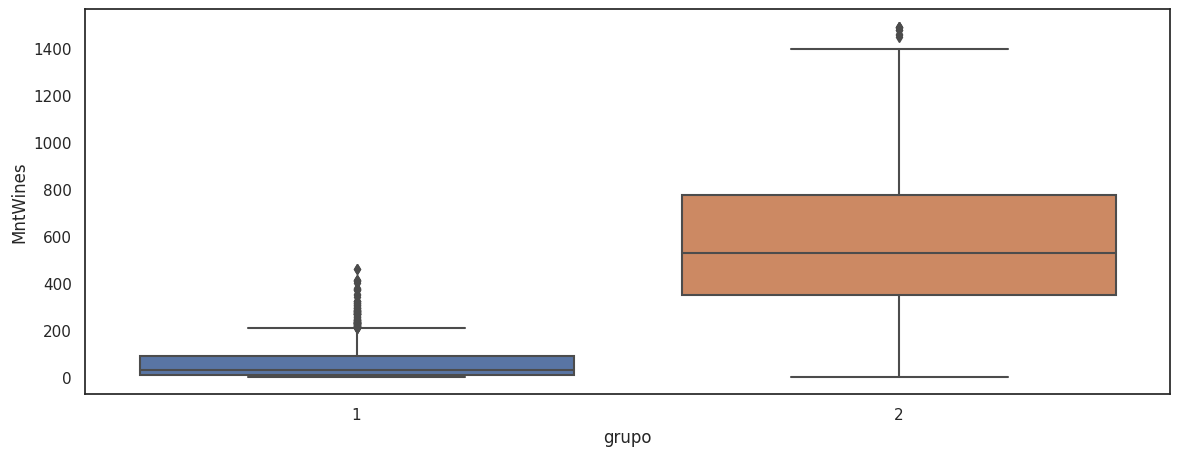

In [51]:
sns.boxplot(data=df, x='grupo', y='MntWines');

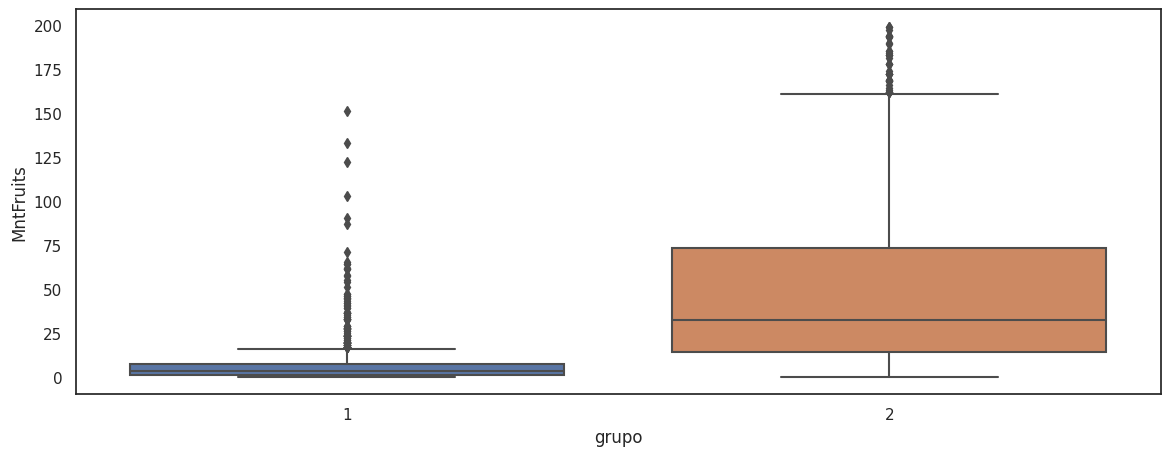

In [52]:
sns.boxplot(data=df, x='grupo', y='MntFruits');

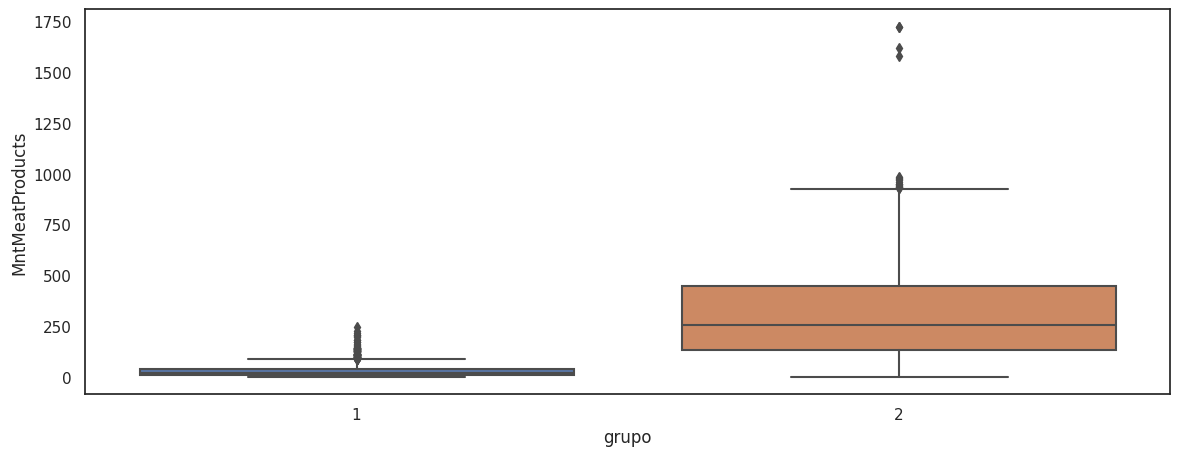

In [53]:
sns.boxplot(data=df, x='grupo', y='MntMeatProducts');

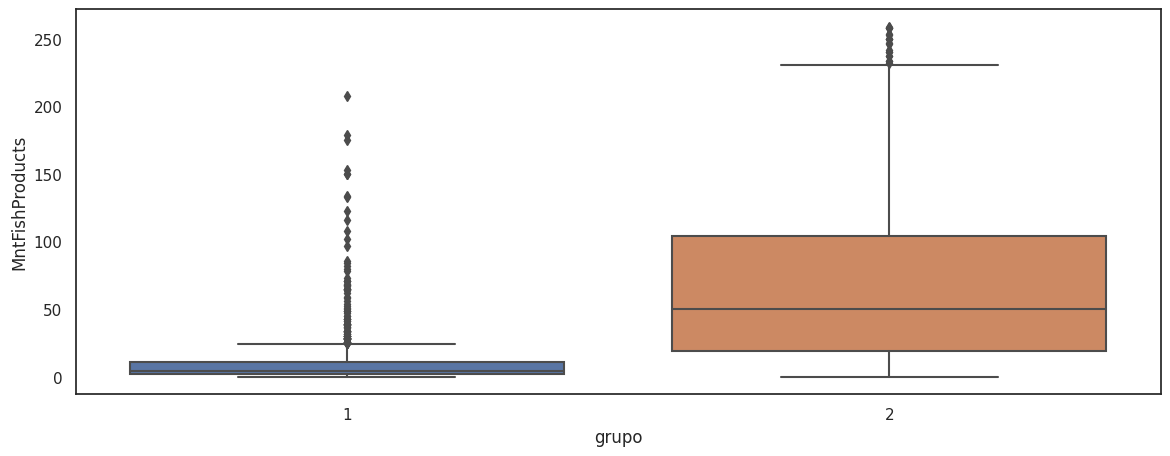

In [54]:
sns.boxplot(data=df, x='grupo', y='MntFishProducts');

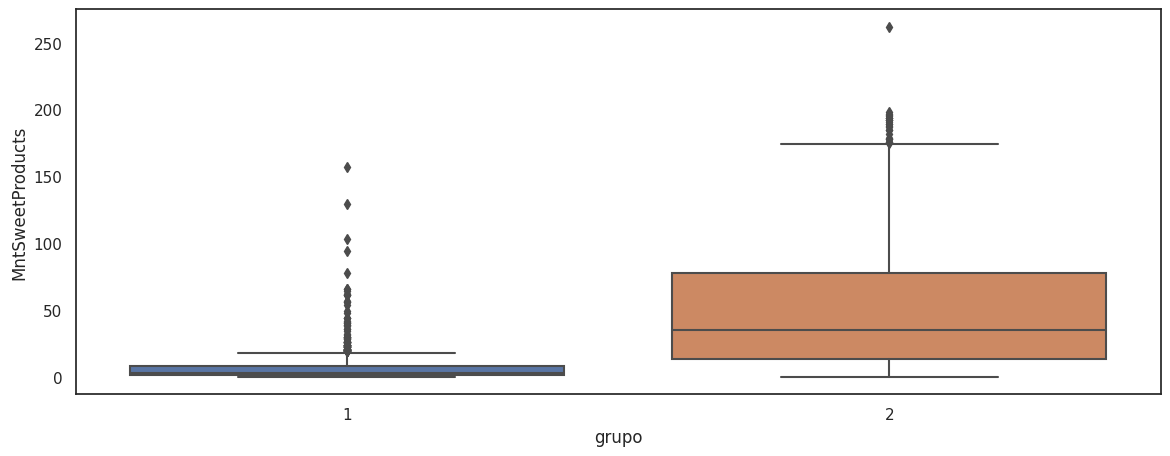

In [55]:
sns.boxplot(data=df, x='grupo', y='MntSweetProducts');

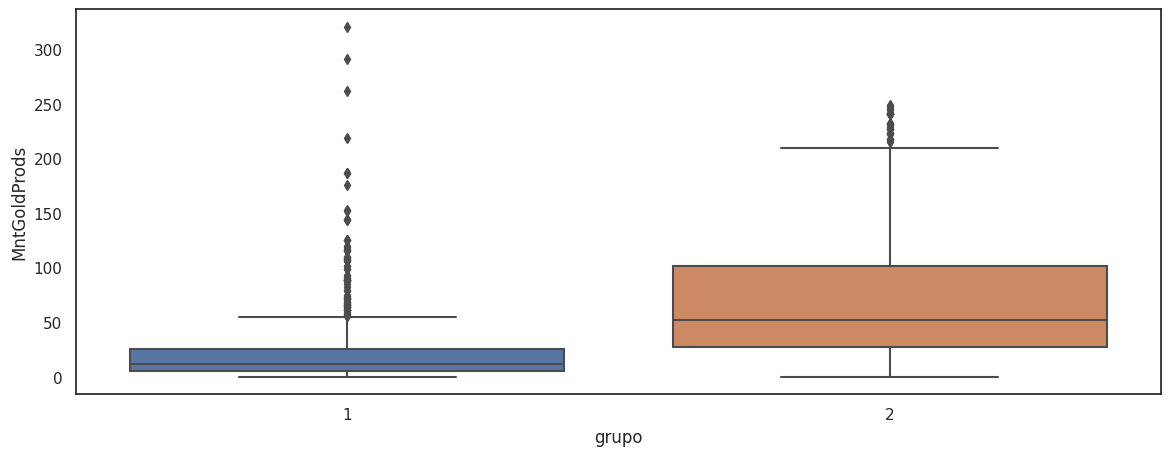

In [56]:
sns.boxplot(data=df, x='grupo', y='MntGoldProds');

**Comment**: In general, group 2 buys more of all types of products than group 1. It is possible to observe that group 1 spends more on wines and gold. Then, group 1 spends more on fruit and fish. Group 2 spends less on meat.

#### Activty 8.2: Create histograms to visualize the groups.

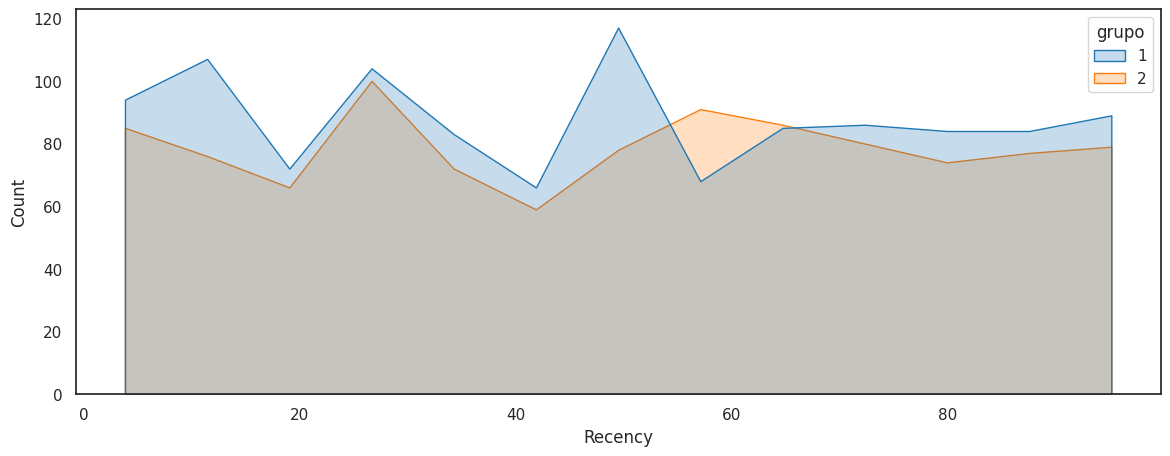

In [57]:
# Recency
sns.histplot(data=df, x='Recency', hue='grupo', element='poly', palette='tab10');

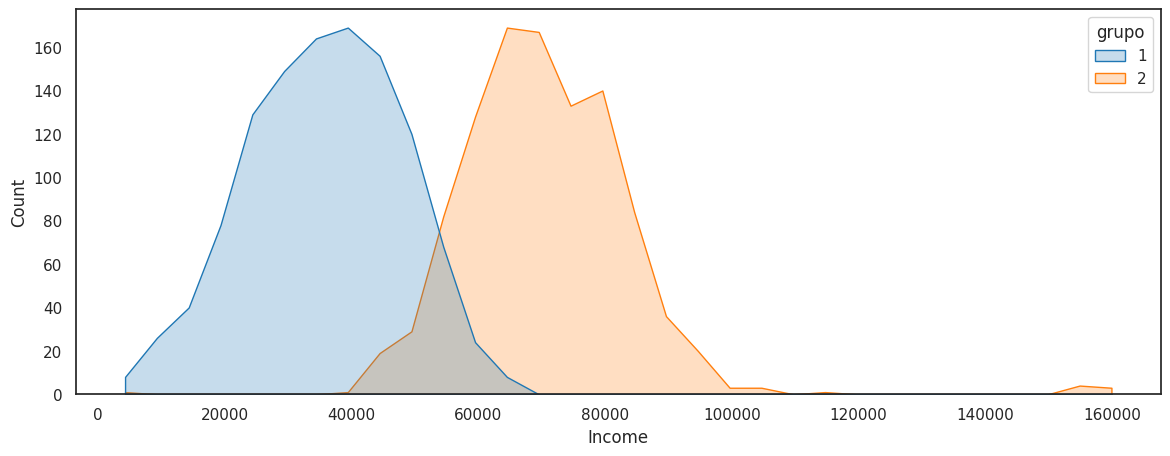

In [58]:
# Income
sns.histplot(data=df, x='Income', hue='grupo', element='poly', palette='tab10');

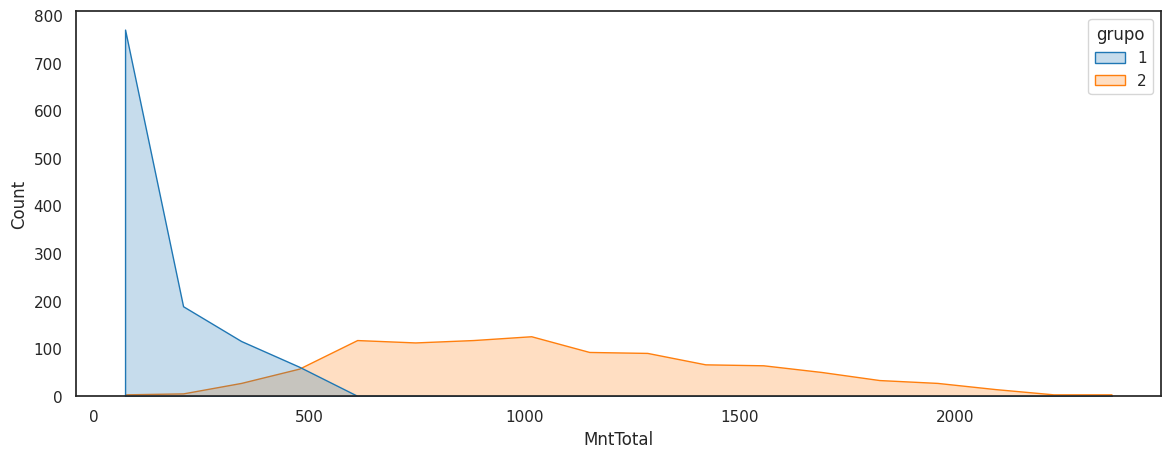

In [59]:
# MntTotal
sns.histplot(data=df, x='MntTotal', hue='grupo', element='poly', palette='tab10');

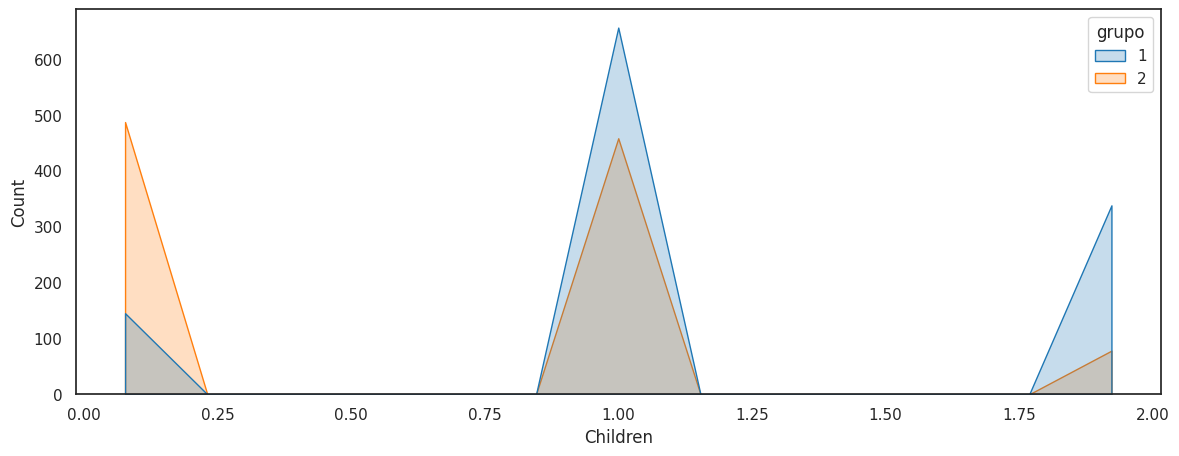

In [60]:
# Children
sns.histplot(data=df, x='Children', hue='grupo', element='poly', palette='tab10');

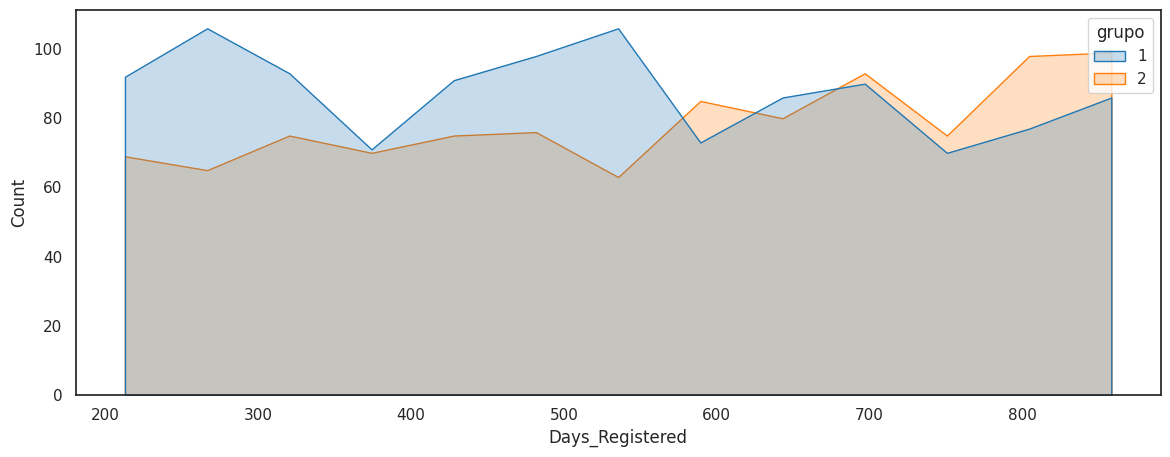

In [61]:
# Days_Registered
sns.histplot(data=df, x='Days_Registered', hue='grupo', element='poly', palette='tab10');

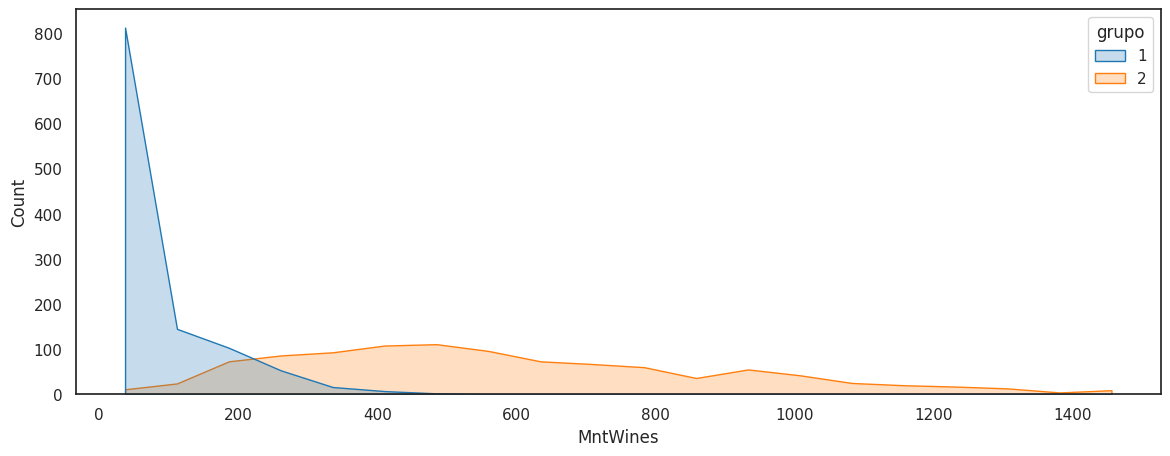

In [62]:
# MntWines
sns.histplot(data=df, x='MntWines', hue='grupo', element='poly', palette='tab10');

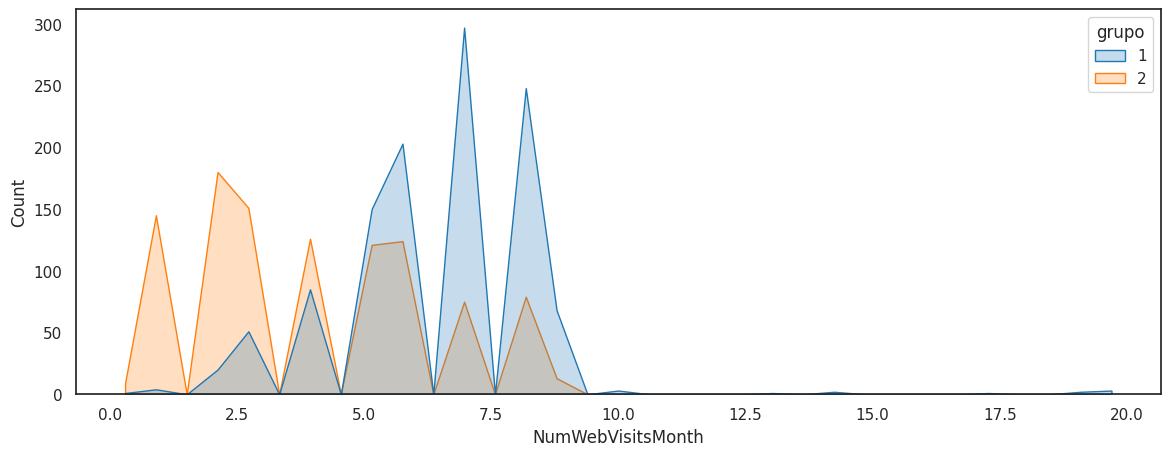

In [63]:
# NumWebVisitsMonth
sns.histplot(data=df, x='NumWebVisitsMonth', hue='grupo', element='poly', palette='tab10');

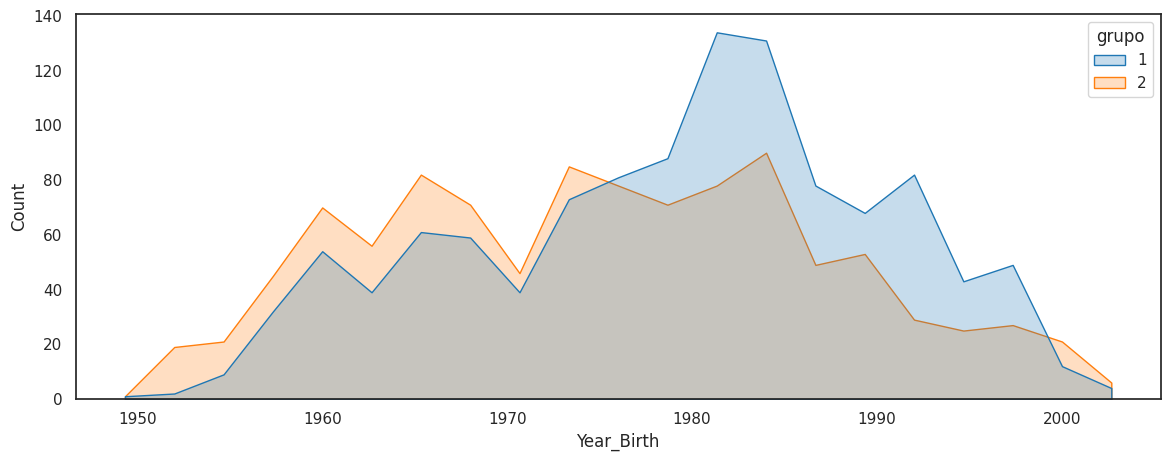

In [64]:
# Year_Birth
sns.histplot(data=df, x='Year_Birth', hue='grupo', element='poly', palette='tab10');

## Testing t = 3

In [65]:
grupos3 = fcluster(distancias, t=3, criterion='maxclust')
grupos3

array([3, 1, 2, ..., 2, 2, 1], dtype=int32)

In [66]:
df['agrupamento'] = grupos3
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Days_Registered,Recency,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,MntTotal,grupo,agrupamento
0,5524,1965,Graduation,Single,58138.0,0,0,04-09-2020,849,58,...,0,0,0,3,11,1,0,1445,2,3
1,2174,1962,Graduation,Single,46344.0,1,1,08-03-2022,299,38,...,0,0,0,3,11,0,2,25,1,1
2,4141,1973,Graduation,Together,71613.0,0,0,21-08-2021,498,26,...,0,0,0,3,11,0,0,665,2,2
3,6182,1992,Graduation,Together,26646.0,1,0,10-02-2022,325,26,...,0,0,0,3,11,0,1,43,1,1
4,5324,1989,PhD,Married,58293.0,1,0,19-01-2022,347,94,...,0,0,0,3,11,0,1,376,2,2


In [67]:
grupo1 = df[df['agrupamento'] == 1]
grupo2 = df[df['agrupamento'] == 2]
grupo3 = df[df['agrupamento'] == 3]

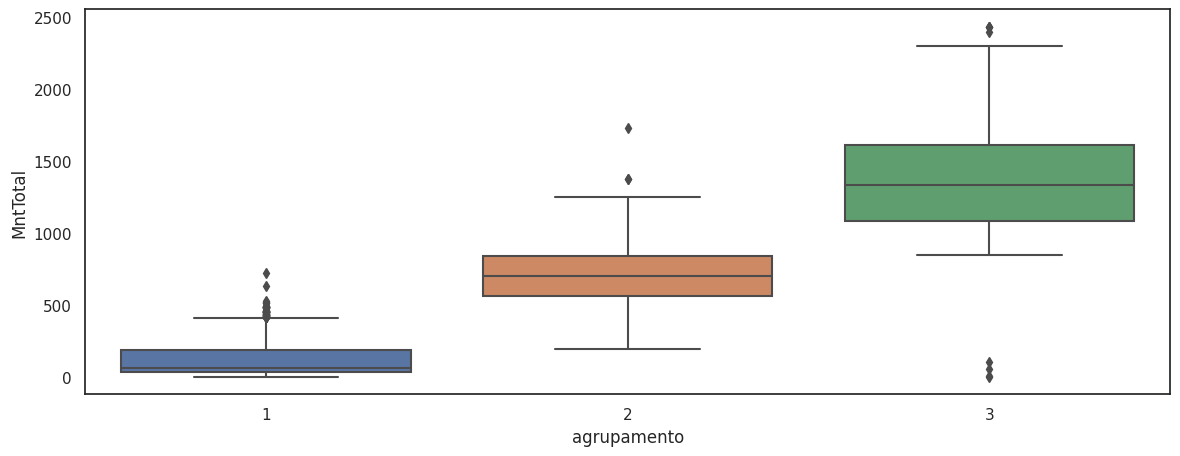

In [68]:
sns.boxplot(data=df, x='agrupamento', y='MntTotal');

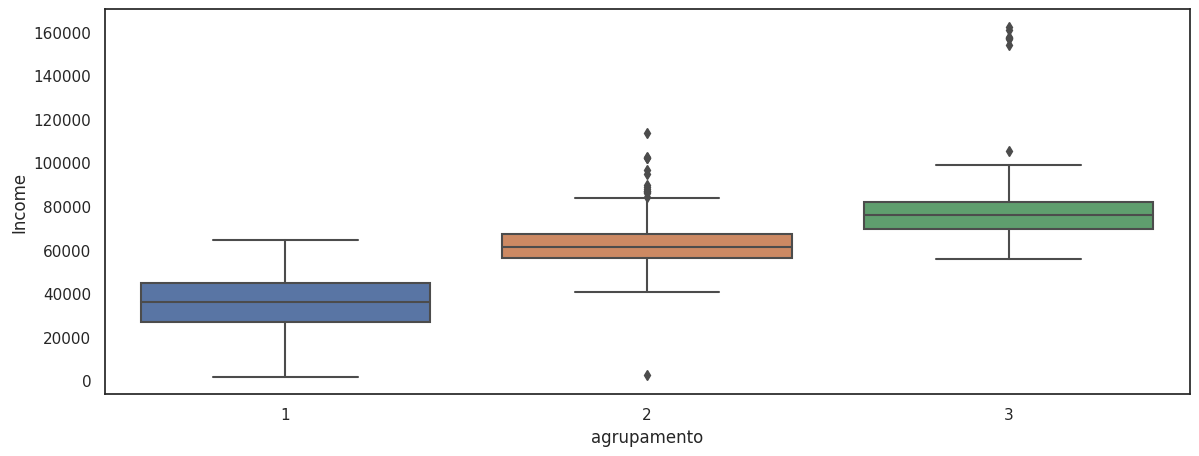

In [69]:
sns.boxplot(data=df, x='agrupamento', y='Income');

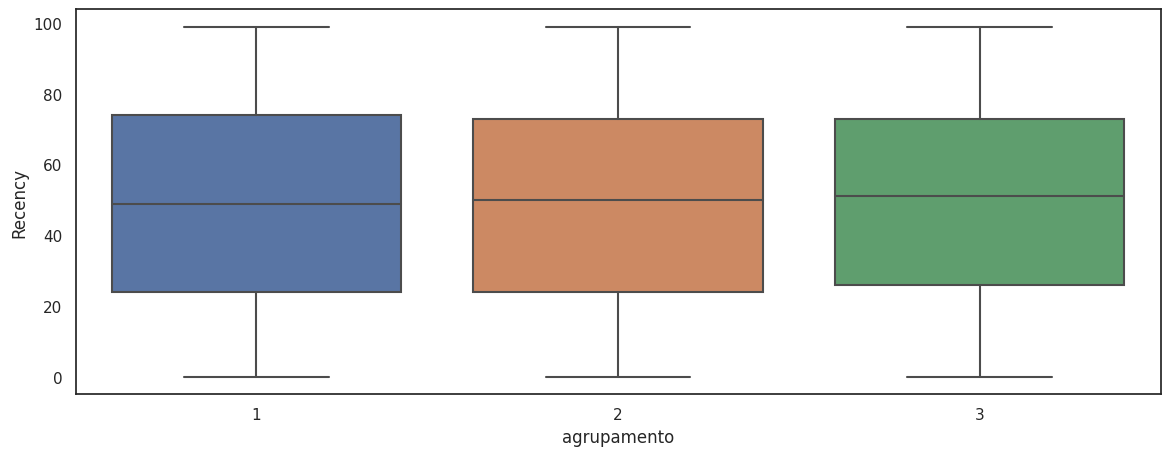

In [70]:
sns.boxplot(data=df, x='agrupamento', y='Recency');

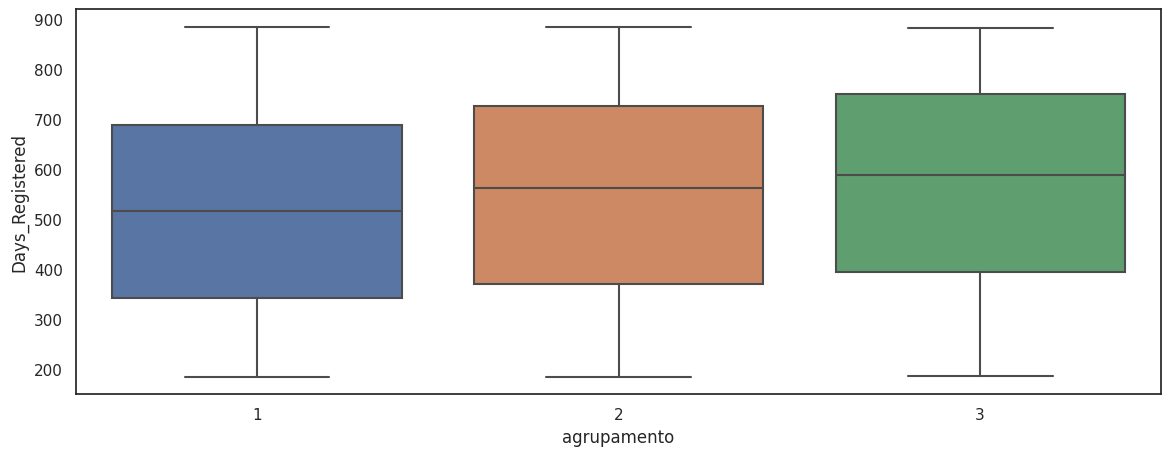

In [71]:
sns.boxplot(data=df, x='agrupamento', y='Days_Registered');

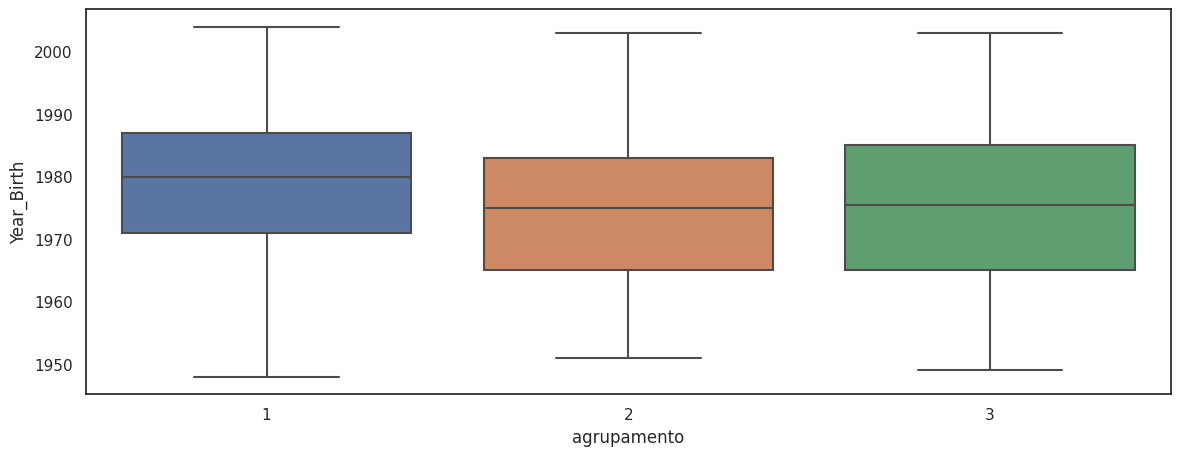

In [72]:
sns.boxplot(data=df, x='agrupamento', y='Year_Birth');

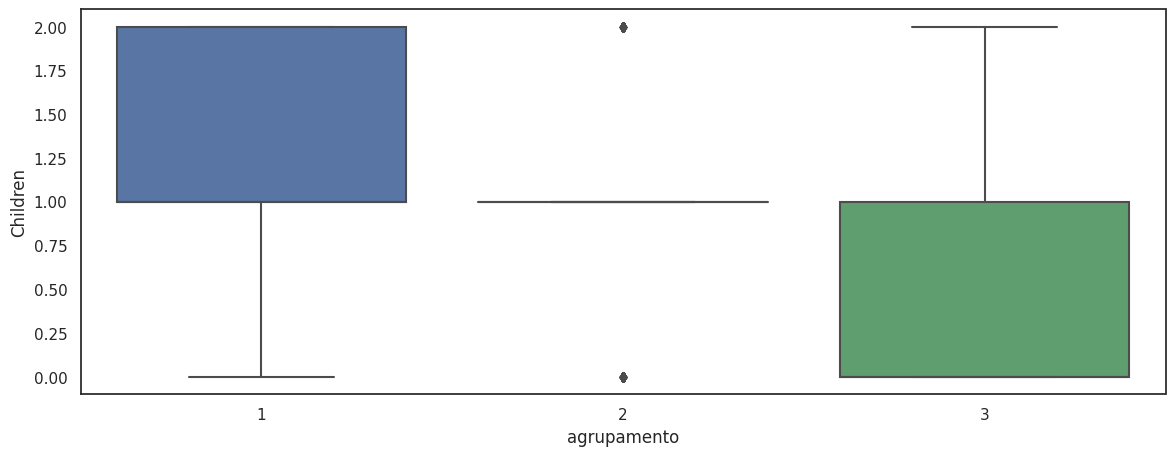

In [73]:
sns.boxplot(data=df, x='agrupamento', y='Children');

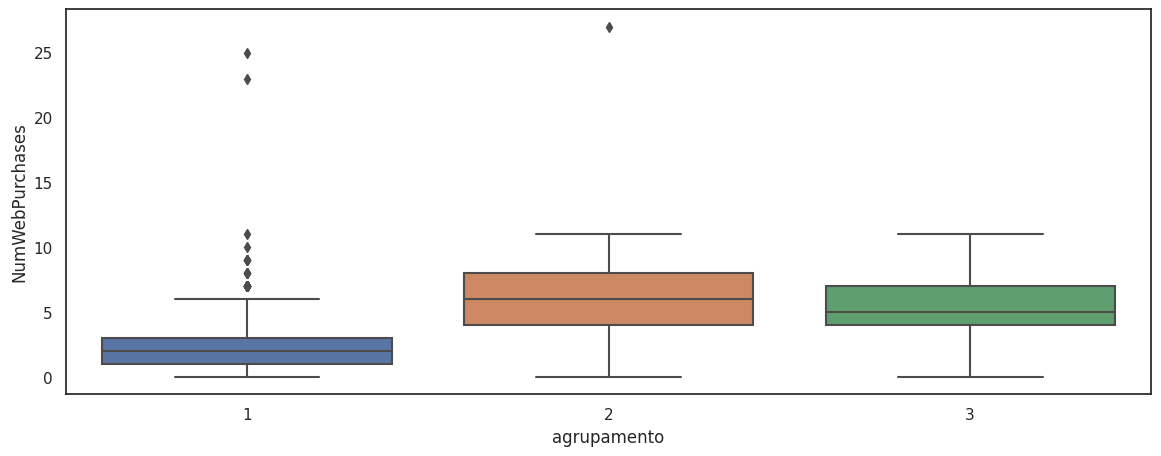

In [74]:
sns.boxplot(data=df, x='agrupamento', y='NumWebPurchases');

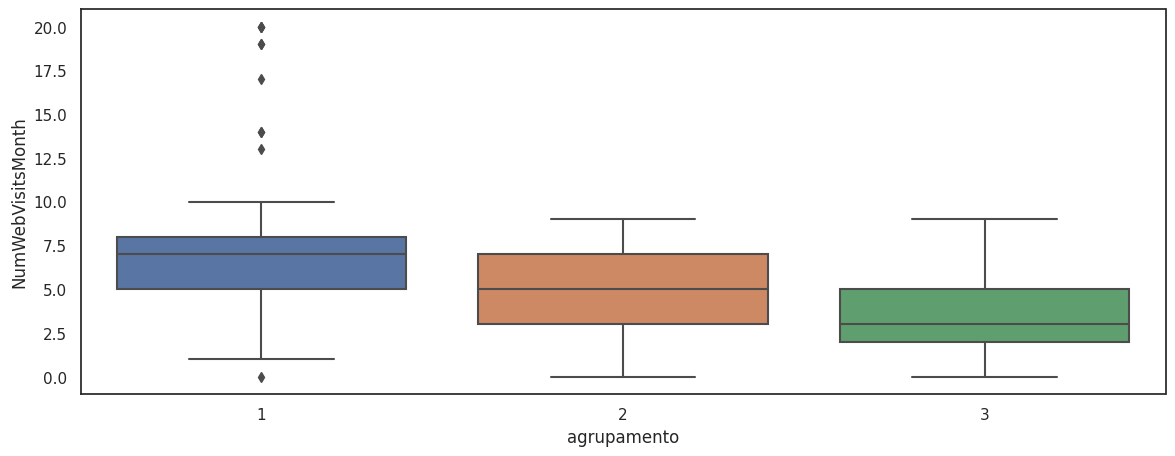

In [75]:
sns.boxplot(data=df, x='agrupamento', y='NumWebVisitsMonth');

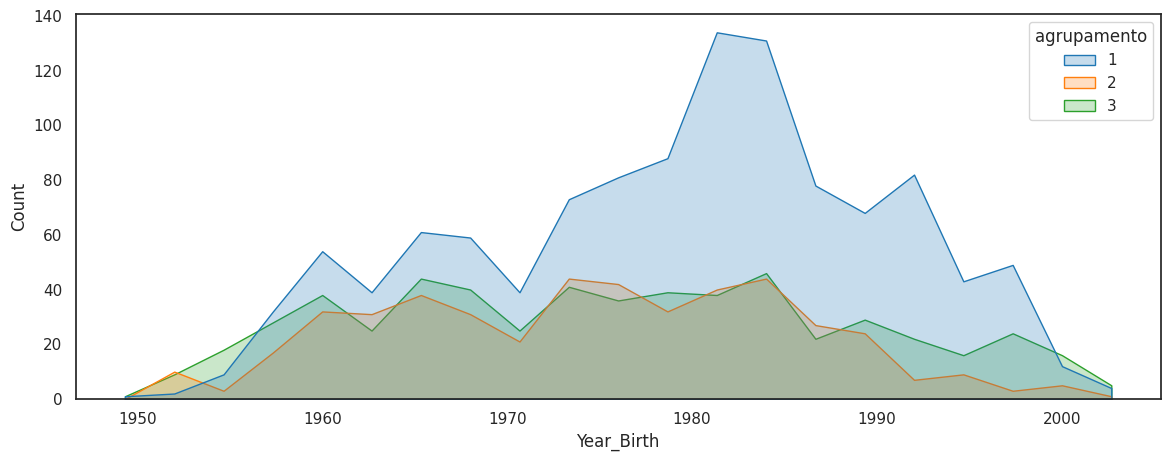

In [76]:
sns.histplot(data=df, x='Year_Birth', hue='agrupamento', element='poly', palette='tab10');

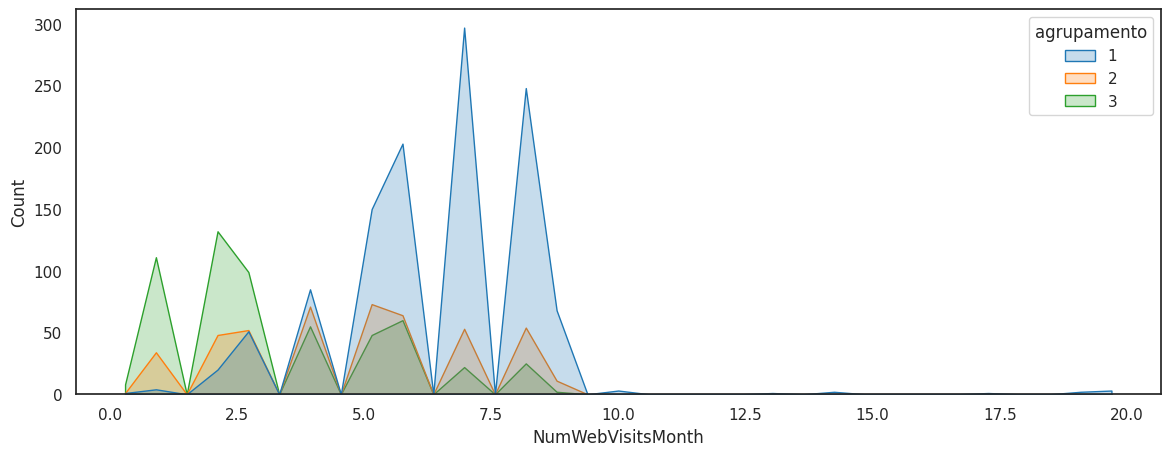

In [77]:
sns.histplot(data=df, x='NumWebVisitsMonth', hue='agrupamento', element='poly', palette='tab10');

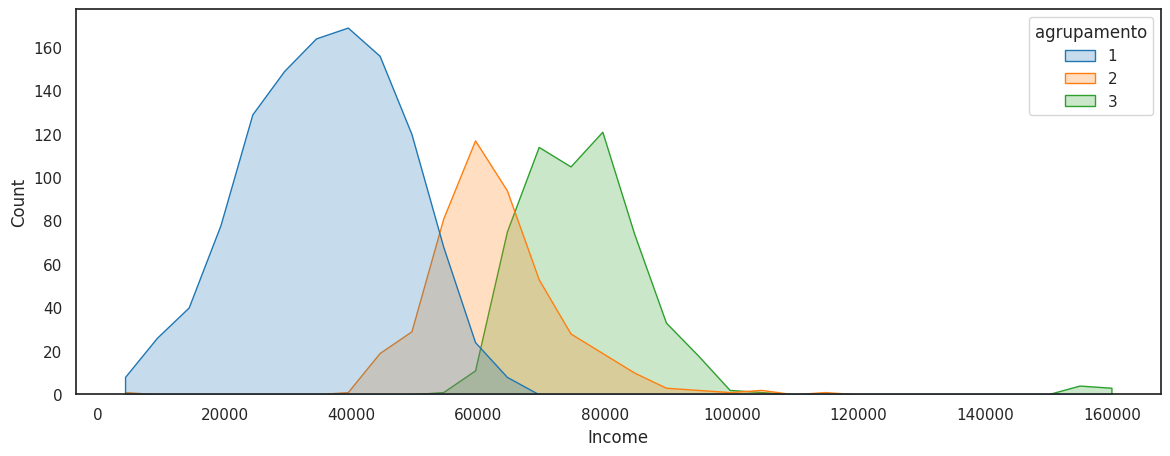

In [78]:
sns.histplot(data=df, x='Income', hue='agrupamento', element='poly', palette='tab10');

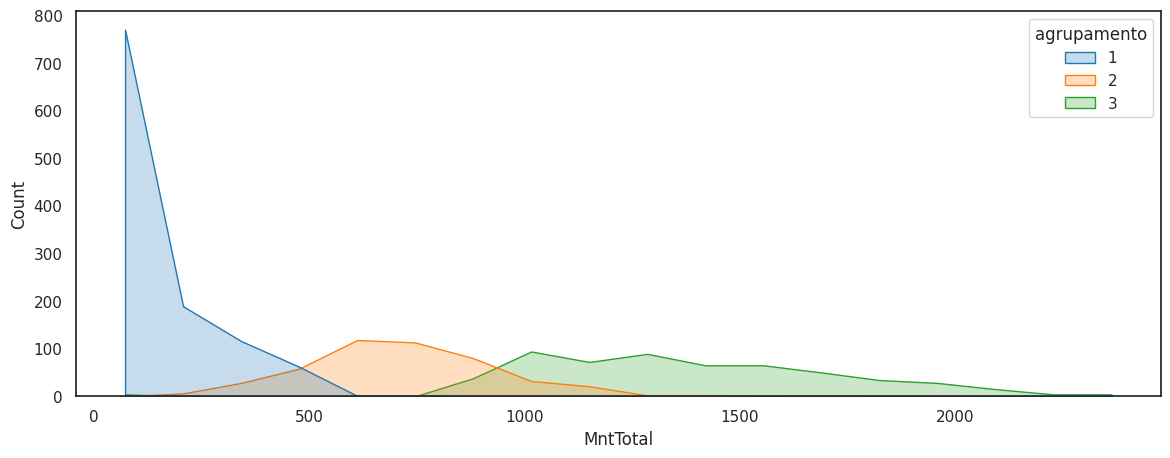

In [79]:
sns.histplot(data=df, x='MntTotal', hue='agrupamento', element='poly', palette='tab10');

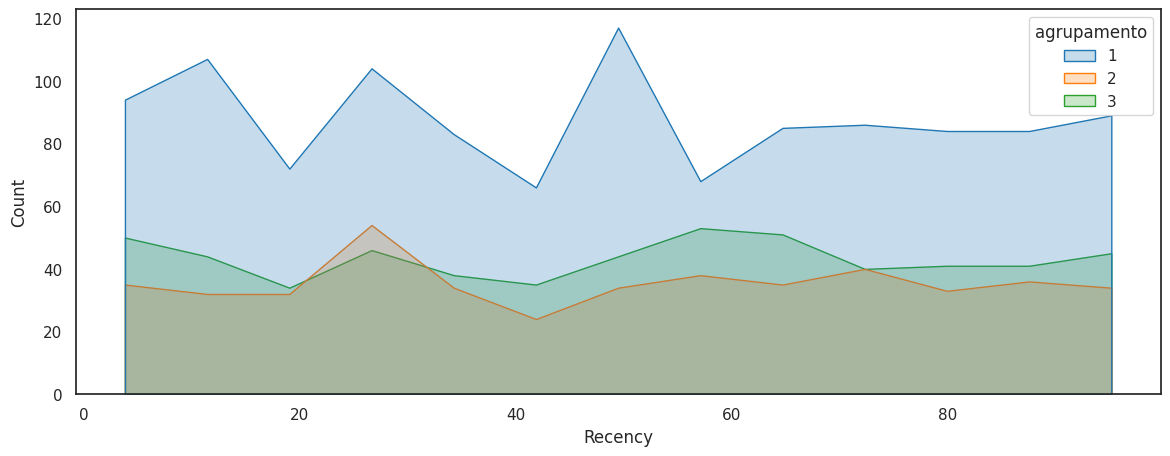

In [80]:
sns.histplot(data=df, x='Recency', hue='agrupamento', element='poly', palette='tab10');

**Comment**: Using 3 clusters, it is observed that there is not a significant amount of information to differentiate a third cluster, as 2 of them are always very close together, when the 3 are not overlapping. Therefore, one can identify 2 groups in the data that are relatively well apart, but separating the data into 3 does not bring new information about the groups and their characteristics.

### Activity 9: Analyze each group in order to create an adequate description of it (persona).

In [81]:
# group 1 descriptive statistic data
grupo1.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Days_Registered,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,MntTotal,grupo,agrupamento
count,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,...,1139.000000,1139.000000,1139.000000,1139.0,1139.0,1139.000000,1139.000000,1139.000000,1139.0,1139.0
mean,5551.907814,1978.915716,35641.094820,0.691835,0.477612,523.908692,48.444249,64.917471,6.682177,30.919227,...,0.003512,0.001756,0.010536,3.0,11.0,0.106234,1.169447,129.599649,1.0,1.0
std,3280.789907,11.121549,12231.970126,0.489641,0.520392,199.907765,29.053995,82.845603,12.490733,34.955666,...,0.059183,0.041885,0.102146,0.0,0.0,0.308272,0.629040,128.263279,0.0,0.0
min,9.000000,1948.000000,1730.000000,0.000000,0.000000,186.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,5.000000,1.0,1.0
25%,2690.000000,1971.000000,26882.000000,0.000000,0.000000,344.000000,24.000000,9.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.000000,38.000000,1.0,1.0
50%,5393.000000,1980.000000,36130.000000,1.000000,0.000000,518.000000,49.000000,28.000000,3.000000,17.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.000000,68.000000,1.0,1.0
75%,8343.500000,1987.000000,44976.500000,1.000000,1.000000,688.500000,74.000000,88.000000,7.000000,40.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2.000000,189.000000,1.0,1.0
max,11191.000000,2004.000000,64587.000000,2.000000,2.000000,885.000000,99.000000,459.000000,151.000000,243.000000,...,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2.000000,727.000000,1.0,1.0


In [82]:
grupo1['NumWebVisitsMonth'].describe()

count    1139.000000
mean        6.467076
std         1.950511
min         0.000000
25%         5.000000
50%         7.000000
75%         8.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64

In [89]:
grupo1_lista = ['75% is 36 yo or older',
                'USD 35,641',
                'Até USD 727',
                '75% has 2 children',
                '75% hasnt purchased for 74',
                'Up to 20']

In [90]:
# group 2 descriptive statistic data
grupo2.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Days_Registered,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,MntTotal,grupo,agrupamento
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,...,461.000000,461.000000,461.000000,461.0,461.0,461.000000,461.000000,461.000000,461.0,461.0
mean,5562.689805,1974.310195,62387.639913,0.171367,0.733189,551.368764,49.147505,410.741866,34.817787,166.219089,...,0.049892,0.019523,0.008677,3.0,11.0,0.112798,0.904555,714.340564,2.0,2.0
std,3309.467547,10.852834,10580.801663,0.388593,0.506871,202.443504,28.544396,207.536358,41.481916,126.391239,...,0.217957,0.138504,0.092845,0.0,0.0,0.316690,0.589400,214.403650,0.0,0.0
min,1.000000,1951.000000,2447.000000,0.000000,0.000000,186.000000,0.000000,1.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,194.000000,2.0,2.0
25%,2727.000000,1965.000000,56129.000000,0.000000,0.000000,372.000000,24.000000,254.000000,7.000000,90.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.000000,568.000000,2.0,2.0
50%,5430.000000,1975.000000,61180.000000,0.000000,1.000000,563.000000,50.000000,383.000000,21.000000,134.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.000000,705.000000,2.0,2.0
75%,8602.000000,1983.000000,67272.000000,0.000000,1.000000,726.000000,73.000000,524.000000,47.000000,216.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.000000,844.000000,2.0,2.0
max,11176.000000,2003.000000,113734.000000,2.000000,2.000000,884.000000,99.000000,1181.000000,199.000000,1725.000000,...,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2.000000,1729.000000,2.0,2.0


In [91]:
grupo2['NumWebVisitsMonth'].describe()

count    461.000000
mean       4.817787
std        2.188256
min        0.000000
25%        3.000000
50%        5.000000
75%        7.000000
max        9.000000
Name: NumWebVisitsMonth, dtype: float64

In [92]:
grupo2_lista = ['75% is 39 yo or older',
                'USD 70,385',
                'Até USD 2,431',
                '75% has only 1 child',
                '75% hasnt purchased for 73',
                'Up to 9']

In [96]:
dicionario_grupos = {'Group 1':grupo1_lista,
                     'Group 2':grupo2_lista}

In [97]:
personas = pd.DataFrame(dicionario_grupos, index=['Age','Average family income','Total purchase (last 2 years)', 'Children', 'Days without purchasing', 'Visits to website (last month)'])
personas

,Group 1,Group 2
Age,75% is 36 yo or older,75% is 39 yo or older
Average family income,"USD 35,641","USD 70,385"
Total purchase (last 2 years),Até USD 727,"Até USD 2,431"
Children,75% has 2 children,75% has only 1 child
Days without purchasing,75% hasnt purchased for 74,75% hasnt purchased for 73
Visits to website (last month),Up to 20,Up to 9


**Description of the Groups for t = 2:**

* Group 1 is made up of people who are younger, have children, earn less, spend less and visit the store's website more.

* Group 2 is made up of people who are older, most do not have children, earn more, buy more and have been customers of the supermarket for longer.

* Both groups have customers who have not shopped at the supermarket for more than 60 days, with group 1 having a little more people in this situation compared to group 2, but the difference is very small.

**Marketing and sales strategies**:

* Offers of products that group 1 buys more, such as wines, on the supermarket website.

* Personalized communication with product offers that each group buys more, so that they buy again.